# Inaugural project

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

In [2]:
from ExchangeEconomy import ExchangeEconomyClass

In [3]:
model = ExchangeEconomyClass()

# Question 1 - Pareto Improvement

In [4]:
N = 75
grid_x1A = np.linspace(0.0,1.0,N)
grid_x2A = np.linspace(0.0,1.0,N)

In [44]:
# Check the utility under intial endowments
print(f'initial utility A is {model.utility_A(par.w1A, par.w2A)}')
print(f'initial utility B is {model.utility_B((1-par.w1A), (1-par.w2A))}')

initial utility A is 0.41601676461038084
initial utility B is 0.30365889718756617


In [40]:
#Create grids for utility values
N = 75
utility_gridA = np.zeros((N, N))  # Create a grid for utility values
utility_gridB = np.zeros((N, N))
grid_x1A = np.linspace(0.0, 1.0, N)
grid_x2A = np.linspace(0.0, 1.0, N)

# Create a meshgrid of x1A and x2A values
X1A, X2A = np.meshgrid(grid_x1A, grid_x2A)


# Compute utility for each combination of x1A and x2A
for i in range(N):
    for j in range(N):
        utility_gridA[i, j] = model.utility_A(X1A[i, j], X2A[i, j])
        utility_gridB[i, j] = model.utility_B((1 - X1A[i, j]), (1 - X2A[i, j]))

print(utility_gridA)
print(utility_gridB)
print(utility_gridB.shape)



[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01351351 0.01702596 ... 0.05621848 0.05647756 0.05673428]
 [0.         0.02145137 0.02702703 ... 0.08924128 0.08965253 0.09006005]
 ...
 [0.         0.23387831 0.2946682  ... 0.97297297 0.97745678 0.98189983]
 [0.         0.23603887 0.29739034 ... 0.98196126 0.98648649 0.99097058]
 [0.         0.23818958 0.30010007 ... 0.99090859 0.99547505 1.        ]]
[[1.         0.99097058 0.98189983 ... 0.09006005 0.05673428 0.        ]
 [0.99547505 0.98648649 0.97745678 ... 0.08965253 0.05647756 0.        ]
 [0.99090859 0.98196126 0.97297297 ... 0.08924128 0.05621848 0.        ]
 ...
 [0.30010007 0.29739034 0.2946682  ... 0.02702703 0.01702596 0.        ]
 [0.23818958 0.23603887 0.23387831 ... 0.02145137 0.01351351 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(75, 75)


In [47]:
# Compute utility of the initial endowment
initial_utilityA = model.utility_A(par.w1A, par.w2A)
initial_utilityB = model.utility_B((1 - par.w1A), (1 - par.w2A))

# Create set C: Checking for pareto improvements
C_Grid = ((utility_gridA >= initial_utilityA) & (utility_gridB >= initial_utilityB)).astype(int)

print(C_Grid)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


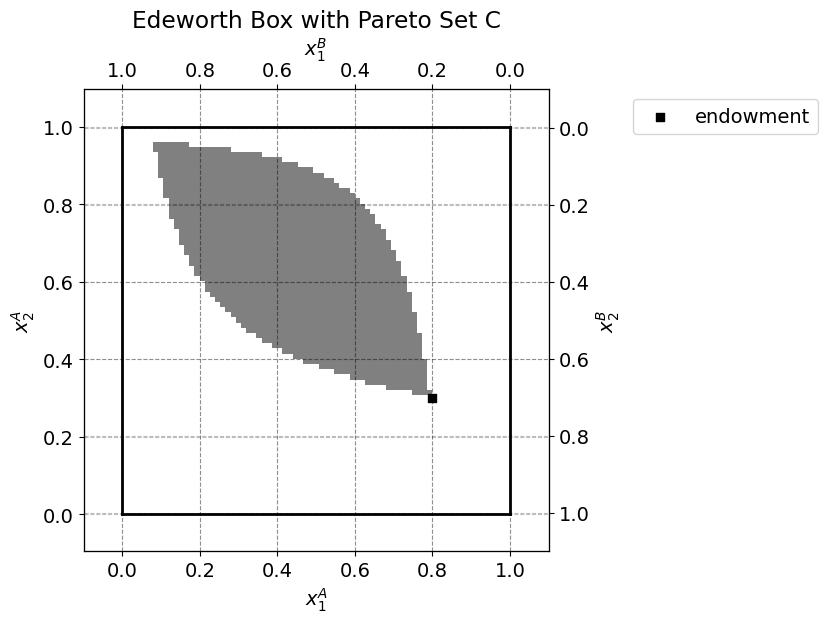

In [97]:
# Plot the Edgeworth box and overlay C_Grid
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot the binary grid C_Grid
ax_A.imshow(C_Grid, extent=[0, w1bar, 0, w2bar], origin='lower', cmap='binary', alpha=0.5)

# Scatter plot for the endowment
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment')

# limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.title('Edeworth Box with Pareto Set C')
plt.show()


# Question 2: Error in market clearing

error in market clearing condition for p1=0.5: eps1=  0.53333333, eps2= -0.26666667
error in market clearing condition for p1=0.5202020202020202: eps1=  0.48932039, eps2= -0.25454545
error in market clearing condition for p1=0.5404040404040404: eps1=  0.44859813, eps2= -0.24242424
error in market clearing condition for p1=0.5606060606060606: eps1=  0.41081081, eps2= -0.23030303
error in market clearing condition for p1=0.5808080808080808: eps1=  0.37565217, eps2= -0.21818182
error in market clearing condition for p1=0.601010101010101: eps1=  0.34285714, eps2= -0.20606061
error in market clearing condition for p1=0.6212121212121212: eps1=  0.31219512, eps2= -0.19393939
error in market clearing condition for p1=0.6414141414141414: eps1=  0.28346457, eps2= -0.18181818
error in market clearing condition for p1=0.6616161616161617: eps1=  0.25648855, eps2= -0.16969697
error in market clearing condition for p1=0.6818181818181819: eps1=  0.23111111, eps2= -0.15757576
error in market clearing c

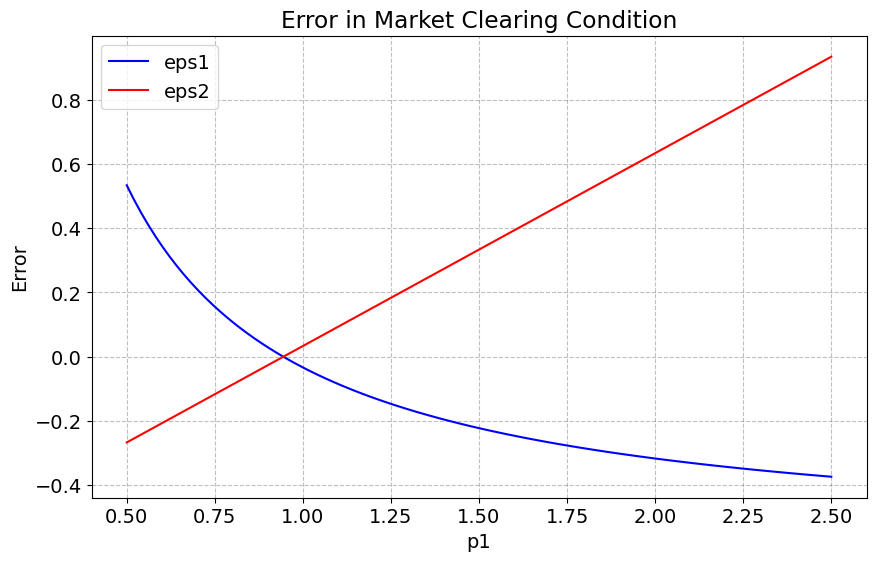

In [51]:
pN = 100 # Number of grid points (N)
p1_grid = np.linspace(0.5, 2.5, pN) # Creating a grid of p1 values
grid_mkt_clearing = np.zeros((pN, 2))  # Creating a 2D array to store eps1 and eps2

for index, value in enumerate(p1_grid):
    eps1, eps2 = model.check_market_clearing(value)
    grid_mkt_clearing[index] = eps1, eps2  # Storing eps1 and eps2 separately
    print(f'error in market clearing condition for p1={value}: eps1={eps1:12.8f}, eps2={eps2:12.8f}')

# Plotting the errors
plt.figure(figsize=(10, 6))
plt.plot(p1_grid, grid_mkt_clearing[:, 0], label='eps1', color='blue')
plt.plot(p1_grid, grid_mkt_clearing[:, 1], label='eps2', color='red')
plt.xlabel('p1')
plt.ylabel('Error')
plt.title('Error in Market Clearing Condition')
plt.legend()
plt.grid(True)
plt.show()

# Question 3 - Market Clearing price

In [52]:
pN = 100
p1_grid = np.linspace(0.5, 2.5, pN)
grid_mkt_clearing = np.zeros((pN, 2))  # Creating a 2D array to store eps1 and eps2

tolerance = 1e-6  # Define a tolerance level for closeness to zero

for index, value in enumerate(p1_grid):
    eps1, eps2 = model.check_market_clearing(value)
    grid_mkt_clearing[index] = eps1, eps2  # Storing eps1 and eps2 separately
    #print(f'excess demand for p1={value}: eps1={eps1:12.8f}, eps2={eps2:12.8f}')
    
    # Check if both eps1 and eps2 are close to zero
    if abs(eps1) < tolerance and abs(eps2) < tolerance:
        print(f'market celaring price: {value}')

market celaring price: 0.9444444444444444


# Question 4a

I think we need to constrain the problem so that $x_1^B = 1 - x_1^A$ and $x_2^B = 1 - x_2^A$ like in set C. This is not 100% clear in the assignment...

Notice that at the lower bound of 0.5, there is negative $x_1^A$, so I adjust this slightly higher...

In [92]:
pN = 100
p1_grid = np.linspace(0.54, 2.5, pN) # Change lower bound slightly for positive consumption
grid_mkt = np.zeros(pN)  # Creating a 2D array to store utility values

for index, value in enumerate(p1_grid):
    # Compute utility for each p value
    x1B, x2B = model.demand_B(value)
    utility = model.utility_A(x1A=1-x1B, x2A=1-x2B)
    grid_mkt[index] = utility  # Storing utility 

# Print the utility values
print("Utility values:")
print(grid_mkt)

# Check if there are any NaN values
if np.isnan(grid_mkt).any():
    print("There are NaN values in utility.")
else:
    # Print the maximum utility value
    print(f'Maximum utility is {np.max(grid_mkt)}')


Utility values:
[0.10964644 0.25997822 0.3194545  0.35966839 0.39030238 0.41501922
 0.4356591  0.45329623 0.4686198  0.4821018  0.49408134 0.50481113
 0.51448503 0.52325529 0.53124378 0.53854969 0.54525484 0.55142758
 0.55712556 0.56239785 0.56728661 0.57182826 0.57605453 0.57999317
 0.58366863 0.5871025  0.59031401 0.59332027 0.59613664 0.5987769
 0.60125349 0.60357766 0.60575961 0.60780861 0.60973314 0.61154093
 0.61323907 0.61483406 0.61633189 0.61773808 0.61905772 0.62029553
 0.62145587 0.6225428  0.62356008 0.62451123 0.62539951 0.62622796
 0.62699945 0.62771664 0.62838202 0.62899795 0.62956661 0.63009009
 0.63057032 0.63100913 0.63140826 0.63176933 0.63209388 0.63238337
 0.63263917 0.63286258 0.63305483 0.63321711 0.63335051 0.63345608
 0.63353484 0.63358774 0.63361567 0.6336195  0.63360006 0.63355812
 0.63349443 0.63340971 0.63330463 0.63317985 0.63303598 0.63287363
 0.63269335 0.6324957  0.63228119 0.63205033 0.63180359 0.63154143
 0.63126429 0.6309726  0.63066677 0.63034717 0.

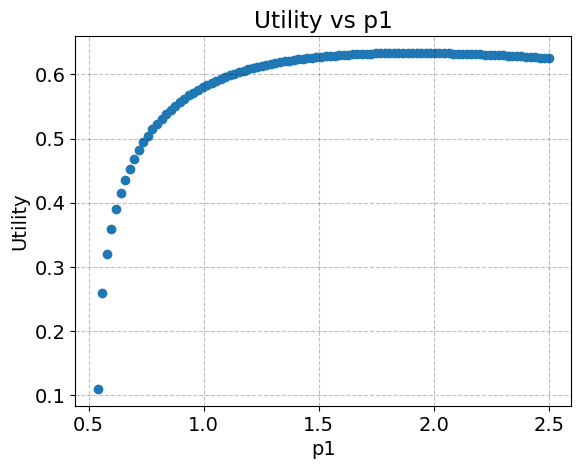

In [93]:
# Plot the utility values
plt.scatter(p1_grid, grid_mkt)
plt.xlabel('p1')
plt.ylabel('Utility')
plt.title('Utility vs p1')
plt.grid(True)
plt.show()

# Question 4B - Analytic Solution



This problem needs to be constrained to ensure strictly non-negative consumption and utility. I use the bounds $p_1 \in [0,5]$ and I find the same maximum (approximately) as in 4a. 

In [96]:
from scipy.optimize import minimize_scalar

# Define the objective function to maximize (utility function)
def objective_function(p):
    # Compute the utility for a given p value
    utility = model.utility_A(1 - model.demand_B(p)[0], 1 - model.demand_B(p)[1])
    return -utility  # We use negative utility because minimize_scalar minimizes by default

# Perform scalar optimization to find the optimal p value
result = minimize_scalar(objective_function, bounds=(0, 5), method='bounded')

# Get the optimal p value
optimal_p = result.x
optimal_utility = -result.fun  # Utility is negative because we used -utility in the objective function

print(f'Optimal p value for maximum utility: {optimal_p}')
print(f'Maximum utility: {optimal_utility}')


Optimal p value for maximum utility: 1.8993456159390096
Maximum utility: 0.6336208506936474


# Question 5a: 

In [104]:
# Initialize variables to store the maximum utility A and corresponding x1A, x2A values
max_utility_A = -float('inf')
max_x1A = None
max_x2A = None

# Iterate over each point in the grid
for i in range(N):
    for j in range(N):
        # Check if the entry in set C is 1 (indicating Pareto improvement)
        if C_Grid[i, j] == 1:
            # Compute utility A for this point
            utilityA = model.utility_A(X1A[i, j], X2A[i, j])
            # Update maximum utility A and corresponding x1A, x2A values if this utility is higher
            if utilityA > max_utility_A:
                max_utility_A = utilityA
                max_x1A = grid_x1A[i]
                max_x2A = grid_x2A[j]

print(f"Maximum utility A with respect to Pareto improvements: {max_utility_A}")
print(f"Corresponding x1A: {max_x1A}")
print(f"Corresponding x2A: {max_x2A}")

Maximum utility A with respect to Pareto improvements: 0.741627044262768
Corresponding x1A: 0.8378378378378379
Corresponding x2A: 0.5810810810810811


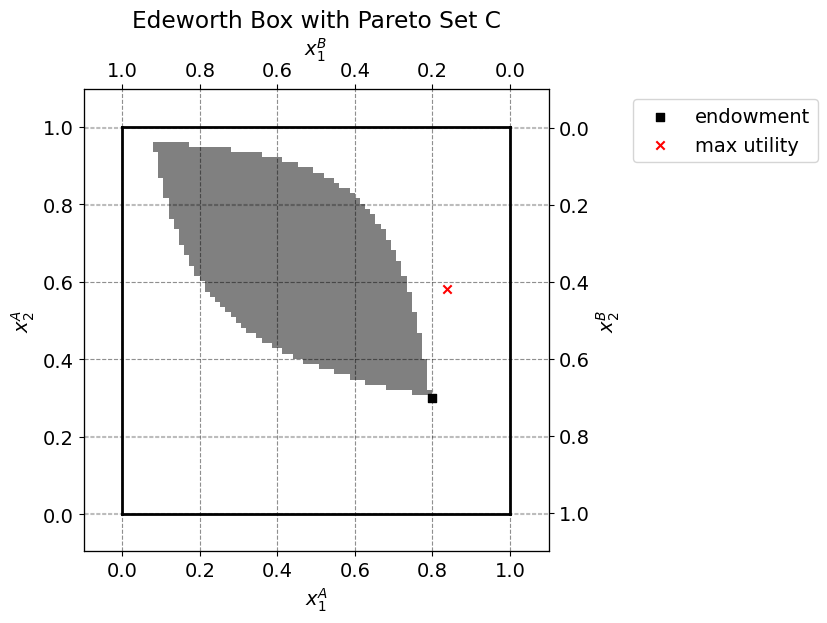

In [105]:
# Plot the Edgeworth box where C is market-maker...
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot the binary grid C_Grid
ax_A.imshow(C_Grid, extent=[0, w1bar, 0, w2bar], origin='lower', cmap='binary', alpha=0.5)

# Show the endowment and utility max 
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment')
ax_A.scatter(max_x1A, max_x2A, marker='x', color='red', label='max utility')

# limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.title('Edeworth Box with Pareto Set C')
plt.show()